In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl
import sklearn.datasets as datasets
%matplotlib inline

# Generate some data using sklearn

In [31]:
(x, y) = datasets.make_moons(3000, noise=0.1)
YES = y > 0
NO  = np.logical_not(YES)

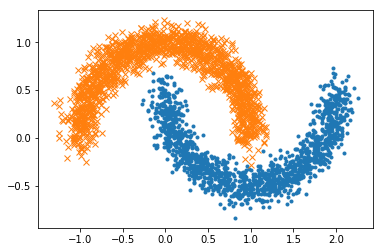

In [32]:
pl.plot(x[YES, 0], x[YES, 1] ,'.', x[NO, 0], x[NO, 1], 'x');

# Define a model using Tensorflow

In [28]:
class N():
    pass

m = N()
m.x = tf.placeholder(tf.float32, shape=(None, 2))
m.ref = tf.placeholder(tf.float32, shape=(None, 1))
m.w = tf.Variable(np.zeros((2, 1)), dtype=tf.float32)
m.b = tf.Variable(0.0, dtype=tf.float32)
Z = tf.matmul(m.x, m.w) + m.b
m.y = tf.sigmoid(Z)
m.err = tf.nn.sigmoid_cross_entropy_with_logits(labels=m.ref, logits=Z)
m.cost = tf.reduce_sum(m.err)

# Train based on batches of data

In [37]:
batch_size = 100
rate = 0.01
epochs = 10

def batch():
    I = np.random.choice(len(x), batch_size)
    x_sample = x[I,:]
    y_sample = y[I]
    return {m.x: x_sample, m.ref: y_sample.reshape((-1, 1))}

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(m.cost)
s = tf.Session()
s.run(tf.global_variables_initializer())
s.run(m.cost, feed_dict=batch())

69.314743

In [38]:
feed = batch()
for ep in range(epochs):
    cost, _ = s.run([m.cost, optimizer], feed)
    if ep % (epochs // 10) == 0:
        print "[%d]: %.4f" % (ep, cost)
print "Done: %.4f" % cost

[0]: 69.3147
[1]: 61.7928
[2]: 56.5902
[3]: 52.8021
[4]: 49.9295
[5]: 47.6798
[6]: 45.8702
[7]: 44.3813
[8]: 43.1321
[9]: 42.0663
Done: 42.0663


# Visual inspection of the performance

In [49]:
n = 100
xs = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), n)
ys = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), n)
xx, yy = np.meshgrid(xs, ys)
x0 = xx.reshape(-1)
x1 = yy.reshape(-1)
xinput = np.asarray([x0, x1]).T

In [51]:
out = s.run(m.y, feed_dict={m.x: xinput})

In [54]:
z = out.reshape((n, n))

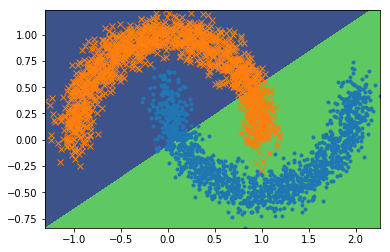

In [58]:
pl.contourf(xx, yy, z, levels=[0, 0.5, 1]);
pl.plot(x[YES, 0], x[YES, 1] ,'.', x[NO, 0], x[NO, 1], 'x');